In [38]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [39]:
excel_file_path = "/media/Datacenter_storage/Ji/BiomedParse/runs/matched_unmatched/20251208_094305/false_positive_preds.xlsx"
df = pd.read_excel(excel_file_path)
series = df['distance_fp_csf']
series = pd.to_numeric(series, errors='coerce')
print(series)

max_num = int(series.max())
min_num = int(series.min())
series_rounded = series.round().astype(int)
print(series_rounded)

0      2.236068
1      5.099020
2      1.000000
3      0.000000
4      1.000000
         ...   
488    1.000000
489    0.000000
490    1.000000
491    1.000000
492    1.000000
Name: distance_fp_csf, Length: 493, dtype: float64
0      2
1      5
2      1
3      0
4      1
      ..
488    1
489    0
490    1
491    1
492    1
Name: distance_fp_csf, Length: 493, dtype: int64


In [40]:
bin_0_10 = list(range(0,11))
bin_11_ = list(range(10, (max_num//10 + 2) * 10, 20))
bins = bin_0_10 + bin_11_[1:]

binned = pd.cut(series, bins, right=False)
counts = binned.value_counts().sort_index()

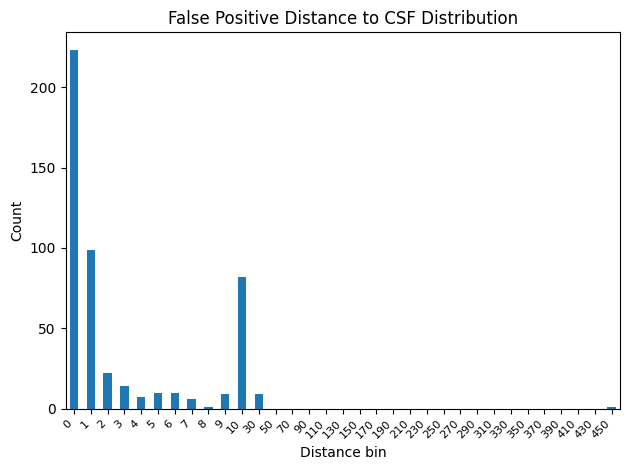

In [41]:
ax = counts.plot(kind="bar")
labels = [f"{int(interval.left)}" for interval in counts.index]
ax.set_xticklabels(labels, rotation=45, ha="right", fontsize=8)

plt.xlabel("Distance bin")
plt.ylabel("Count")
plt.title("False Positive Distance to CSF Distribution")
plt.tight_layout()
plt.show()

### One sample Tracking

0     0.005645
1     0.001106
2     0.003778
3     0.000918
4     0.003333
5     0.003795
6     0.003385
7     0.000929
8     0.000979
9     0.003874
10    0.000915
11    0.000887
12    0.004100
13    0.000695
14    0.000784
15    0.000863
16    0.002880
17    0.003930
18    0.000826
19    0.000828
20    0.000878
21    0.002581
22    0.000852
23    0.000772
24    0.002658
25    0.002754
26    0.002730
27    0.002839
28    0.000775
29    0.002751
30    0.000676
31    0.000748
32    0.000627
33    0.002730
34    0.000790
35    0.002716
36    0.002791
37    0.000780
38    0.002771
39    0.000745
Name: distance_loss, dtype: float64


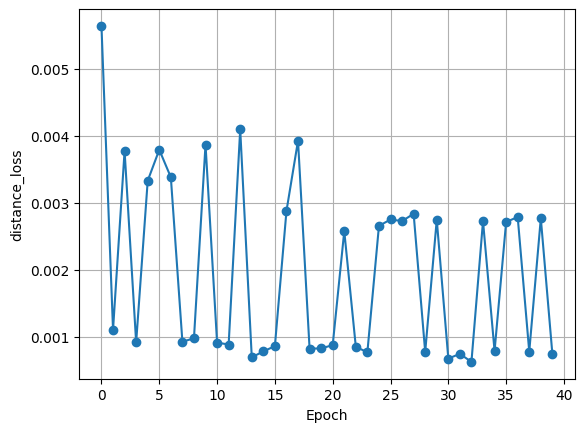

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/media/Datacenter_storage/Ji/BiomedParse/one_sample_distance_loss_tracker.xlsx"
df = pd.read_excel(file_path)

# Use the second column as a Series (y-values)
y = df.iloc[:, 1]
# Use the row index (0,1,2,...) as x, or df.index if it matches Excel row numbers
x = y.index  # 0-based; use (y.index + 1) for Excel row numbers

plt.figure()
plt.plot(x, y, marker='o')  # or plt.scatter(x, y)
plt.xlabel("Epoch")
plt.ylabel(df.columns[1])   # actual values
plt.grid(True)
plt.show()